<a href="https://colab.research.google.com/github/zmathes1/Intro-to-Machine-Learning/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [385]:
# Zachary Matheson
# 801095035
# Assignment 2
# https://github.com/zmathes1/Intro-to-Machine-Learning.git

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import readline

from google.colab import drive
#drive.mount ('/content/drive') # Fix issues connecting to file_path
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'

readline.clear_history()

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [386]:
# List of variables to map
# Fixs issues with these not being values, rather yes or no

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [387]:
# Part 1a

In [388]:
# Setting training size to 80% and tesing size to 20%
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 0)

In [389]:
num_varsa = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [390]:
# Separate features and labels for training
X_train = df_train[num_varsa].values[:, (0,1,2,3,4)]
y_train = df_train[num_varsa].values[:, 5]
m_train = len(y_train)
n_train = len(X_train)

In [391]:
# Separate features and labels for test
X_test = df_test[num_varsa].values[:, (0,1,2,3,4)]
y_test = df_test[num_varsa].values[:, 5]
m_test = len(y_test)
n_test = len(X_test)

In [392]:
# Initializing
X_0train = np.ones((m_train,1))
X_0test = np.ones((m_test,1))

X_1train = X_train.reshape(m_train,5)
X_1test = X_test.reshape(m_test,5)

Xtrain = np.hstack((X_0train, X_1train))
Xtest = np.hstack((X_0test, X_1test))

theta = np.zeros(6)
m= len(housing)

In [393]:
# Cost function
def compute_cost_train(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [394]:
# Gradient descent
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y)
    m_test = len(y_test)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors)
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test

In [395]:
iterations = 1500
alpha = 0.01
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain, Xtest, y_train, y_test, theta, alpha, iterations)

print("Final theta =", theta)
print("Final cost history =", cost_history_train, cost_history_test)

Final theta = [nan nan nan nan nan nan]
Final cost history = [8.92463837e+24 3.45388439e+36 1.33667235e+48 ...            nan
            nan            nan] [9.10256653e+24 3.52274323e+36 1.36332111e+48 ...            nan
            nan            nan]


<ipython-input-394-5cb5f8cafa29>:14: RuntimeWarning: overflow encountered in square
  train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
<ipython-input-394-5cb5f8cafa29>:17: RuntimeWarning: overflow encountered in square
  val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
<ipython-input-394-5cb5f8cafa29>:12: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


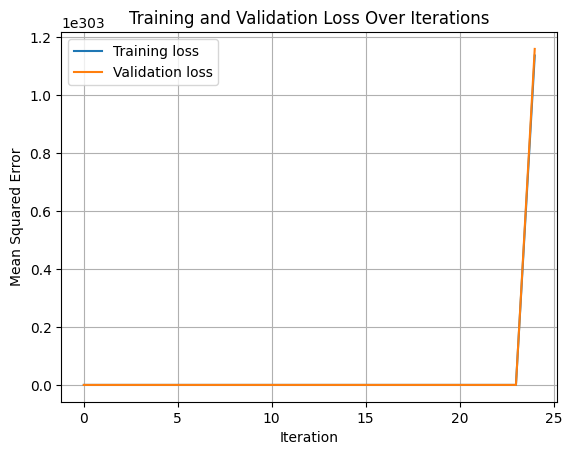

In [396]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [397]:
# Part 1b
readline.clear_history()

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [398]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']

In [399]:
X_train2 = df_train[num_vars].values[:, 0:11]
y_train2 = df_train[num_vars].values[:, 11]
m_train2 = len(y_train2)
n_train2 = len(X_train2)

In [400]:
X_test2 = df_train[num_vars].values[:, 0:11]
y_test2 = df_train[num_vars].values[:, 11]
m_test2 = len(y_test2)
n_test2 = len(X_test2)

In [401]:
X_0train2 = np.ones((m_train2, 1))
X_0test2 = np.ones((m_test2, 1))

X_1train2 = X_train2.reshape(m_train2, 11)
X_1test2 = X_test2.reshape(m_test2, 11)

Xtrain2 = np.hstack((X_0train2, X_1train2))
Xtest2 = np.hstack((X_0test2, X_1test2))

In [402]:
theta2 = np.zeros(12)

In [403]:
iterations2 = 1500
alpha2 = 0.01
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain2, Xtest2, y_train2, y_test2, theta2, alpha2, iterations2)
print("Final theta =", theta)
print("Final cost history =", cost_history_train, cost_history_test)

Final theta = [nan nan nan nan nan nan nan nan nan nan nan nan]
Final cost history = [8.92463902e+24 3.45388487e+36 1.33667263e+48 ...            nan
            nan            nan] [8.92463902e+24 3.45388487e+36 1.33667263e+48 ...            nan
            nan            nan]


<ipython-input-394-5cb5f8cafa29>:14: RuntimeWarning: overflow encountered in square
  train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y))
<ipython-input-394-5cb5f8cafa29>:17: RuntimeWarning: overflow encountered in square
  val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
<ipython-input-394-5cb5f8cafa29>:12: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


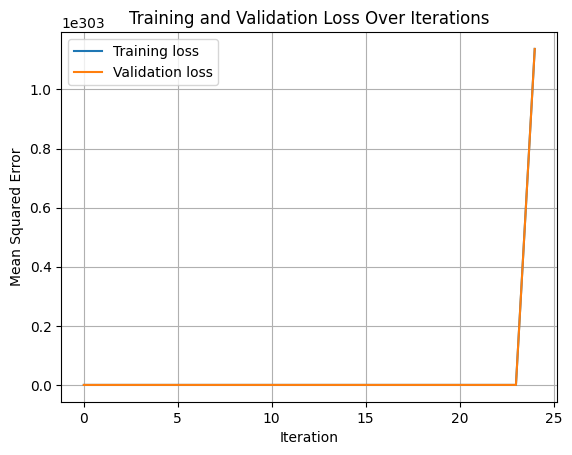

In [404]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [405]:
# Part 2a
readline.clear_history()

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [406]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

num_varsa= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [407]:
X_train3 = df_train[num_varsa].values[:, (0,1,2,3,4)]
y_train3= df_train[num_varsa].values[:, 5]
m_train3 = len(y_train3)
n_train3 = len(X_train3)

In [408]:
X_test3 = df_test[num_varsa].values[:, (0,1,2,3,4)]
y_test3= df_test[num_varsa].values[:, 5]
m_test3 = len(y_test3)
n_test3 = len(X_test3)

In [409]:
X_0train3 = np.ones((m_train3, 1))
X_0test3 = np.ones((m_test3, 1))
X_1train3 = X_train3.reshape(m_train3, 5)
X_1test3 = X_test3.reshape(m_test3, 5)

Xtrain3 = np.hstack((X_0train3, X_1train3))
Xtest3 = np.hstack((X_0test3, X_1test3))

theta3 = np.zeros(6)

In [410]:
iterations3 = 1500
alpha3 = 0.01

theta, cost_history_train, cost_history_test = gradient_descent(Xtrain3, Xtest3, y_train3, y_test3, theta3, alpha3, iterations3)
print("Final theta =", theta)
print("Final cost history =", cost_history_train, cost_history_test)

Final theta = [2.69142506e-16 3.88481822e-01 8.90638430e-02 3.04158793e-01
 2.40439810e-01 1.60108157e-01]
Final cost history = [0.96081488 0.9244999  0.89084186 ... 0.44619265 0.44619265 0.44619265] [0.95880882 0.92059074 0.88512633 ... 0.38897232 0.38897232 0.38897232]


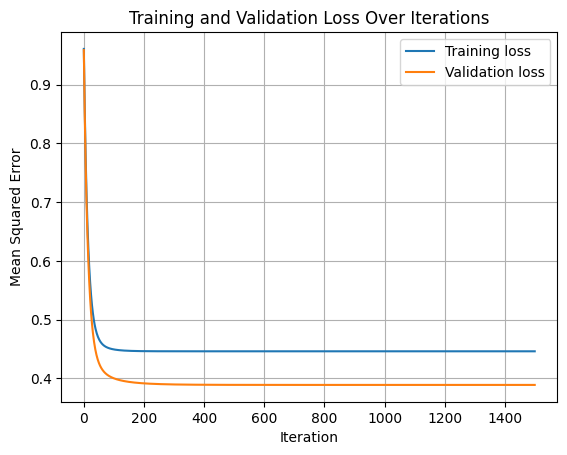

In [411]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [412]:
# Part 2b
readline.clear_history()

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [413]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [414]:
X_train4 = df_train[num_vars].values[:, 0:11]
y_train4= df_train[num_vars].values[:, 11]
m_train4 = len(y_train4)
n_train4 = len(X_train4)

In [415]:
X_test4 = df_test[num_vars].values[:, 0:11]
y_test4= df_test[num_vars].values[:, 11]
m_test4 = len(y_test4)
n_test4 = len(X_test4)

In [416]:
X_0train4 = np.ones((m_train4, 1))
X_0test4 = np.ones((m_test4, 1))

X_1train4 = X_train4.reshape(m_train4, 11)
X_1test4 = X_test4.reshape(m_test4, 11)

Xtrain4 = np.hstack((X_0train4, X_1train4))
Xtest4 = np.hstack((X_0test4, X_1test4))

theta4 = np.zeros(12)

In [417]:
iterations4 = 1500
alpha4 = 0.01
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain4, Xtest4, y_train4, y_test4, theta4, alpha4, iterations4)
print("Final theta =", theta)
print("Final cost history =", cost_history_train, cost_history_test)

Final theta = [-0.48445618  0.29269516  0.05779974  0.26395256  0.20902487  0.1662798
  0.22387773  0.18792349  0.38762621  0.43113978  0.1246105   0.36571346]
Final cost history = [0.95686671 0.91701525 0.88018754 ... 0.33156862 0.33156382 0.33155903] [0.95589211 0.91506926 0.87727607 ... 0.31367132 0.31367673 0.31368213]


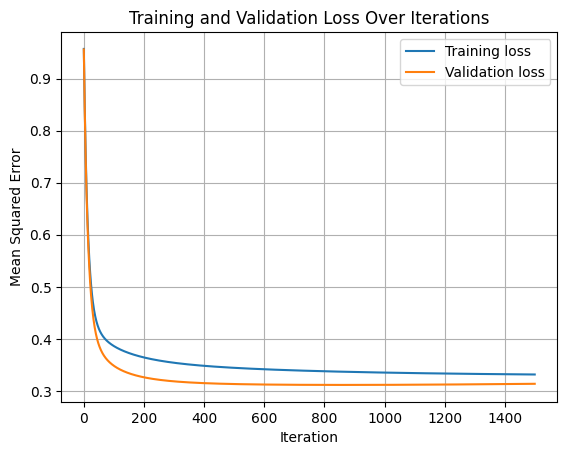

In [418]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [419]:
# Part 3a
readline.clear_history()

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [420]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_varsa= ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [421]:
X_train5 = df_train[num_varsa].values[:, (0,1,2,3,4)]
y_train5= df_train[num_varsa].values[:, 5]
m_train5 = len(y_train5)
n_train5 = len(X_train5)

In [422]:
X_test5 = df_test[num_varsa].values[:, (0,1,2,3,4)]
y_test5= df_test[num_varsa].values[:, 5]
m_test5 = len(y_test5)
n_test5 = len(X_test5)

In [423]:
X_0train5 = np.ones((m_train5, 1))
X_0test5 = np.ones((m_test5, 1))
X_1train5 = X_train5.reshape(m_train5, 5)
X_1test5 = X_test5.reshape(m_test5, 5)

Xtrain5 = np.hstack((X_0train5, X_1train5))
Xtest5 = np.hstack((X_0test5, X_1test5))


In [424]:
# Gradient descent with penalization Updated
def gradient_descent(X, Xtest, y, y_test, theta, alpha, iterations):
    m_train = len(y_train5)
    m_test = len(y_test5)
    cost_history_train = np.zeros(iterations)
    cost_history_test = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        gradients = (2/m_train) * X.transpose().dot(errors) + lambdaa*theta[:1] # Updated
        theta -= alpha * gradients

        train_loss = (1/m_train) * np.sum(np.square(X.dot(theta) - y)) + (lambdaa/(2*m_train)) * np.sum(np.square(theta[1:])) # Updated
        cost_history_train[i] = train_loss

        val_loss = (1/m_test) * np.sum(np.square(Xtest.dot(theta) - y_test))
        cost_history_test[i] = val_loss

    return theta, cost_history_train, cost_history_test

In [425]:
theta5 = np.zeros(6)
iterations5 = 1500
alpha5 = 0.01
lambdaa = 1
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain5, Xtest5, y_train5, y_test5, theta5, alpha5, iterations5)
print("Final theta =", theta)
print("Final cost history =", cost_history_train, cost_history_test)

Final theta = [-5.58352706e-18  3.88481822e-01  8.90638430e-02  3.04158793e-01
  2.40439810e-01  1.60108157e-01]
Final cost history = [0.96081534 0.92450166 0.89084568 ... 0.4465766  0.4465766  0.4465766 ] [0.95880882 0.92059074 0.88512633 ... 0.38897232 0.38897232 0.38897232]


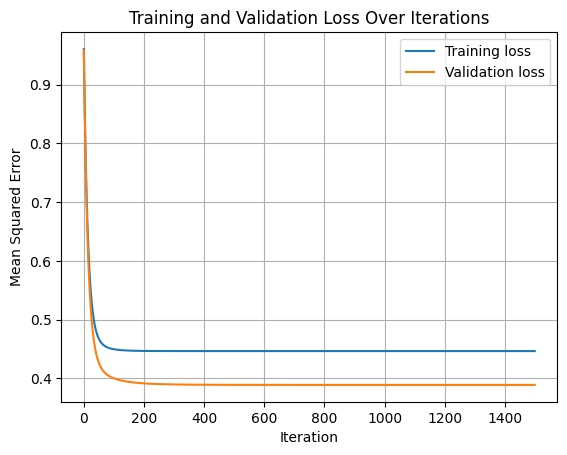

In [426]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [427]:
# Part 3b
readline.clear_history()

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [428]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea','price']

df_train[num_varsa] = scaler.fit_transform(df_train[num_varsa])
df_test[num_varsa] = scaler.fit_transform(df_test[num_varsa])

In [429]:
X_train6 = df_train[num_vars].values[:, 0:11]
y_train6= df_train[num_vars].values[:, 11]
m_train6 = len(y_train6)
n_train6 = len(X_train6)

In [430]:
X_test6 = df_test[num_vars].values[:, 0:11]
y_test6= df_test[num_vars].values[:, 11]
m_test6 = len(y_test6)
n_test6 = len(X_test6)

In [431]:
X_0train6 = np.ones((m_train6, 1))
X_0test6 = np.ones((m_test6, 1))

X_1train6 = X_train6.reshape(m_train6, 11)
X_1test6 = X_test6.reshape(m_test6, 11)

Xtrain6 = np.hstack((X_0train6, X_1train6))
Xtest6 = np.hstack((X_0test6, X_1test6))


In [432]:
theta6 = np.zeros(12)
iterations6 = 1500
alpha6 = 0.1
lambdaa = 0.1
theta, cost_history_train, cost_history_test = gradient_descent(Xtrain6, Xtest6, y_train6, y_test6, theta6, alpha6, iterations6)
print("Final theta =", theta)
print("Final cost history =", cost_history_train, cost_history_test)

Final theta = [-0.6869542   0.29505816  0.04770431  0.24853082  0.216169    0.23690179
  0.38082532  0.2243238   1.61568157  0.59812522  0.10573188  0.48572439]
Final cost history = [0.64556996 0.5096525  0.45333487 ... 0.37255556 0.37255579 0.37255601] [0.63429202 0.48958961 0.42709696 ... 0.48844071 0.48844142 0.48844212]


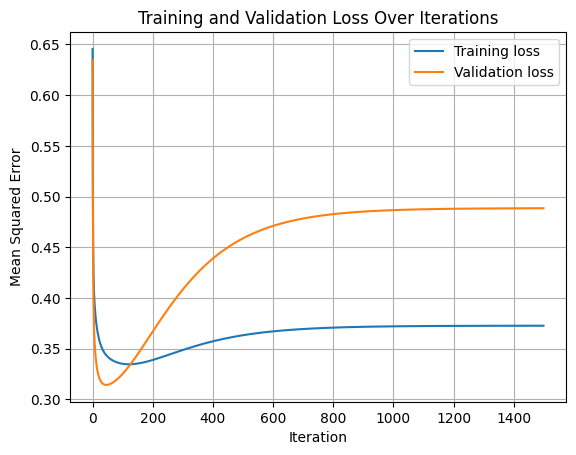

In [433]:
plt.plot(cost_history_train, label="Training loss")
plt.plot(cost_history_test, label="Validation loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.title("Training and Validation Loss Over Iterations")
plt.show()